# Exploratory Data Analysis

## Example 1

Comments on this example:
- Missing item imputation used is direct removal (missing items is relatively few)
- Makes use of the dataset `unemployment_data`

The dataset contains unemployment data for various countries from 2010 to 2021. It includes columns for country code, country name, continent, and annual unemployment rates for each year. 

In [42]:
import pandas as pd

# Load the dataset
file_path = './unemployment_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


In [43]:
# Get information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  182 non-null    object 
 1   country_name  182 non-null    object 
 2   continent     177 non-null    object 
 3   2010          182 non-null    float64
 4   2011          182 non-null    float64
 5   2012          182 non-null    float64
 6   2013          182 non-null    float64
 7   2014          182 non-null    float64
 8   2015          182 non-null    float64
 9   2016          182 non-null    float64
 10  2017          182 non-null    float64
 11  2018          182 non-null    float64
 12  2019          182 non-null    float64
 13  2020          182 non-null    float64
 14  2021          182 non-null    float64
dtypes: float64(12), object(3)
memory usage: 21.5+ KB


The `df.info()` method provides a concise summary of the DataFrame. Here is the interpretation of the output:

- **Class Type**: The DataFrame is of type `<class 'pandas.core.frame.DataFrame'>`.
- **Index Range**: The DataFrame has a RangeIndex from 0 to the number of rows minus one.
- **Number of Entries**: The DataFrame contains a certain number of entries (rows). This number is indicated by the range in the index.
- **Column Count**: The DataFrame has a total of 16 columns.
- **Column Names and Data Types**: Each column name is listed along with its data type. The columns include:
  - `"2010"` to `"2021"`: These columns contain annual unemployment rates and are of type `float64`.
  - `"country_code"`: This column contains country codes and is of type `object`.
  - `"country_name"`: This column contains country names and is of type `object`.
  - `"continent"`: This column contains continent names and is of type `object`.
  - `"average_unemployment_rate"`: This column contains the average unemployment rate and is of type `float64`.
- **Non-Null Count**: For each column, the number of non-null entries is displayed. This helps identify if there are any missing values in the dataset.
- **Memory Usage**: The total memory usage of the DataFrame is displayed, which helps in understanding the memory footprint of the dataset.

This summary is useful for getting a quick overview of the structure and contents of the DataFrame, including data types, missing values, and memory usage.

Do we have missing rows in any of the columns? 

Yes. Since the amount is relatively few (182 minus 177), we can try to just remove these rows with missing items.

In [44]:
# Remove rows with missing items from the dataframe `df`
df = df.dropna()

The first few rows show data for countries like Afghanistan, Angola, Albania, United Arab Emirates, and Argentina, with unemployment rates varying across years and regions.

Next, let's get a summary of the dataset, including data types and basic statistics for numerical columns.

In [45]:
# Display summary of the dataset
summary = df.describe(include='all')
summary

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,177,177,177,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
unique,177,177,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,AFG,Afghanistan,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,8.391017,8.273220,8.291299,8.323503,8.178588,8.067627,7.939492,7.681130,7.442655,7.259661,8.429887,8.401073
std,NaN,NaN,NaN,6.275729,6.278781,6.388354,6.440694,6.310186,6.191898,6.073174,5.929004,5.845693,5.721715,6.075854,6.103023
min,NaN,NaN,NaN,0.450000,0.320000,0.480000,0.250000,0.200000,0.170000,0.150000,0.140000,0.110000,0.100000,0.210000,0.260000
25%,NaN,NaN,NaN,4.010000,3.790000,3.750000,3.700000,3.700000,3.790000,3.860000,3.690000,3.640000,3.510000,4.280000,4.330000
50%,NaN,NaN,NaN,6.960000,6.710000,6.660000,6.350000,6.380000,6.150000,5.950000,5.650000,5.370000,5.210000,6.690000,6.420000
75%,NaN,NaN,NaN,10.890000,10.880000,11.000000,10.600000,10.680000,10.140000,10.200000,10.270000,9.270000,9.500000,11.180000,10.900000


The dataset contains 182 unique countries across 6 continents. The unemployment data spans from 2010 to 2021, with each year having 182 data points. The mean global unemployment rate in 2019 was approximately 7.24%, which increased to around 8.42% in 2020 and slightly decreased to 8.39% in 2021. The continent with the most countries represented is Africa, with 53 countries.

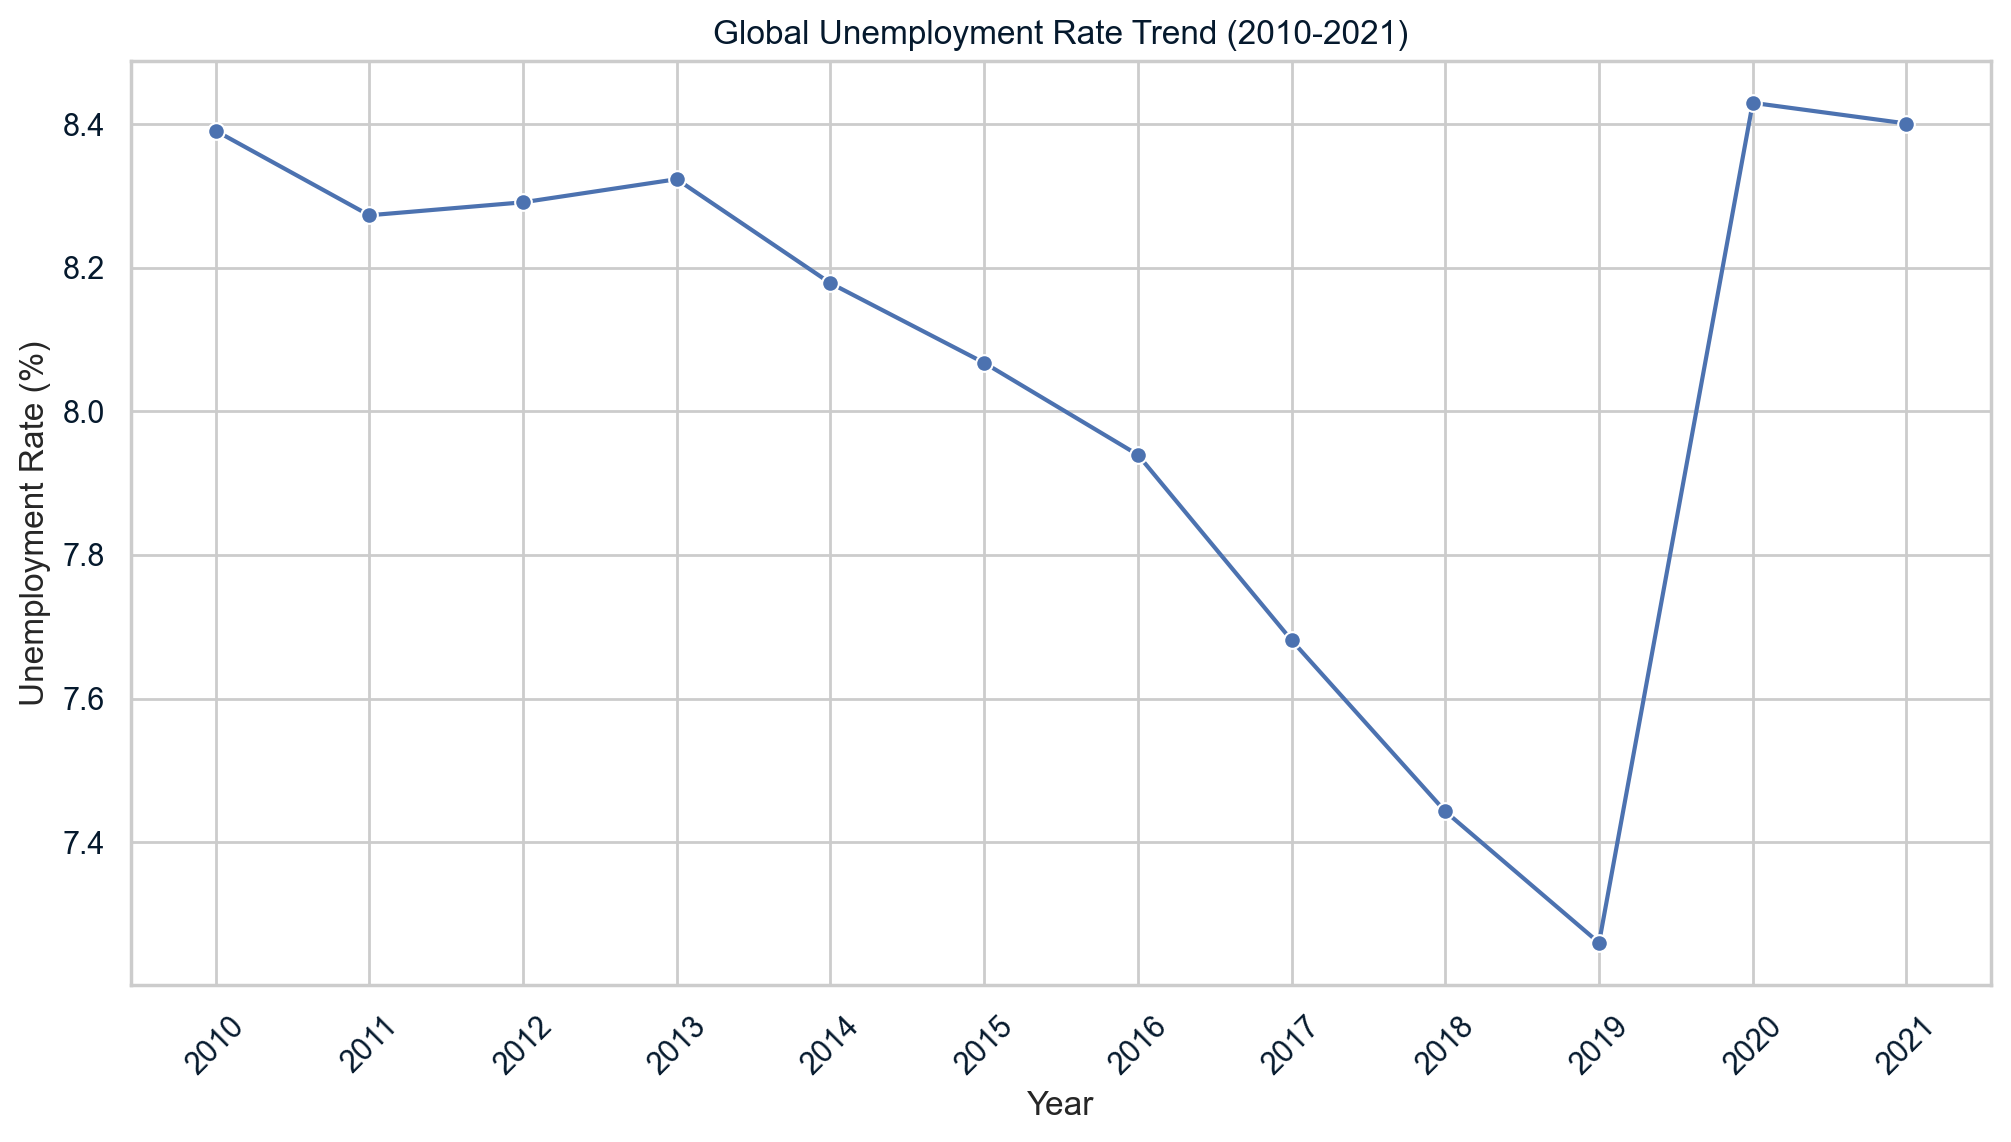

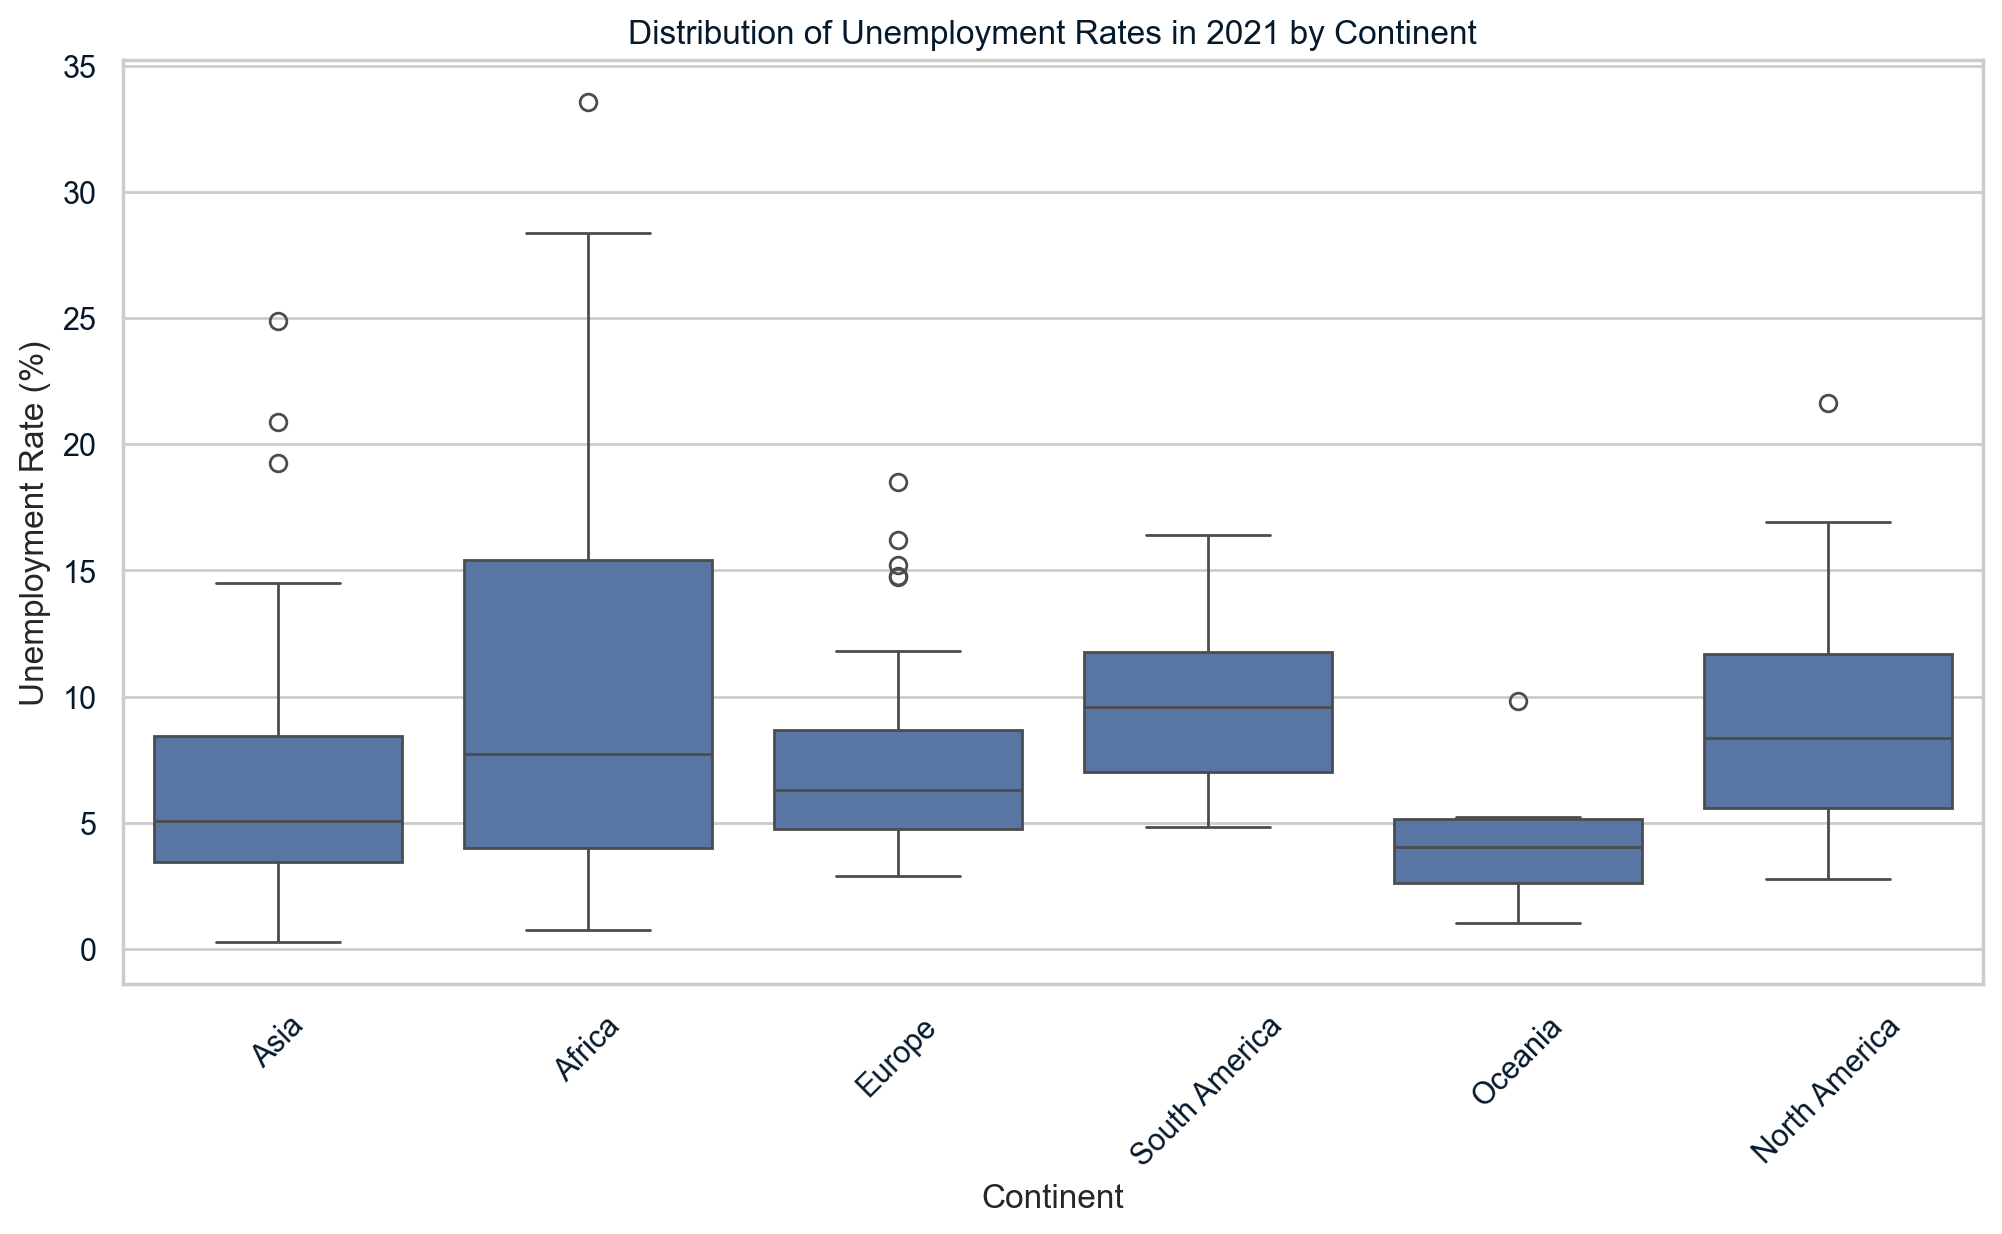

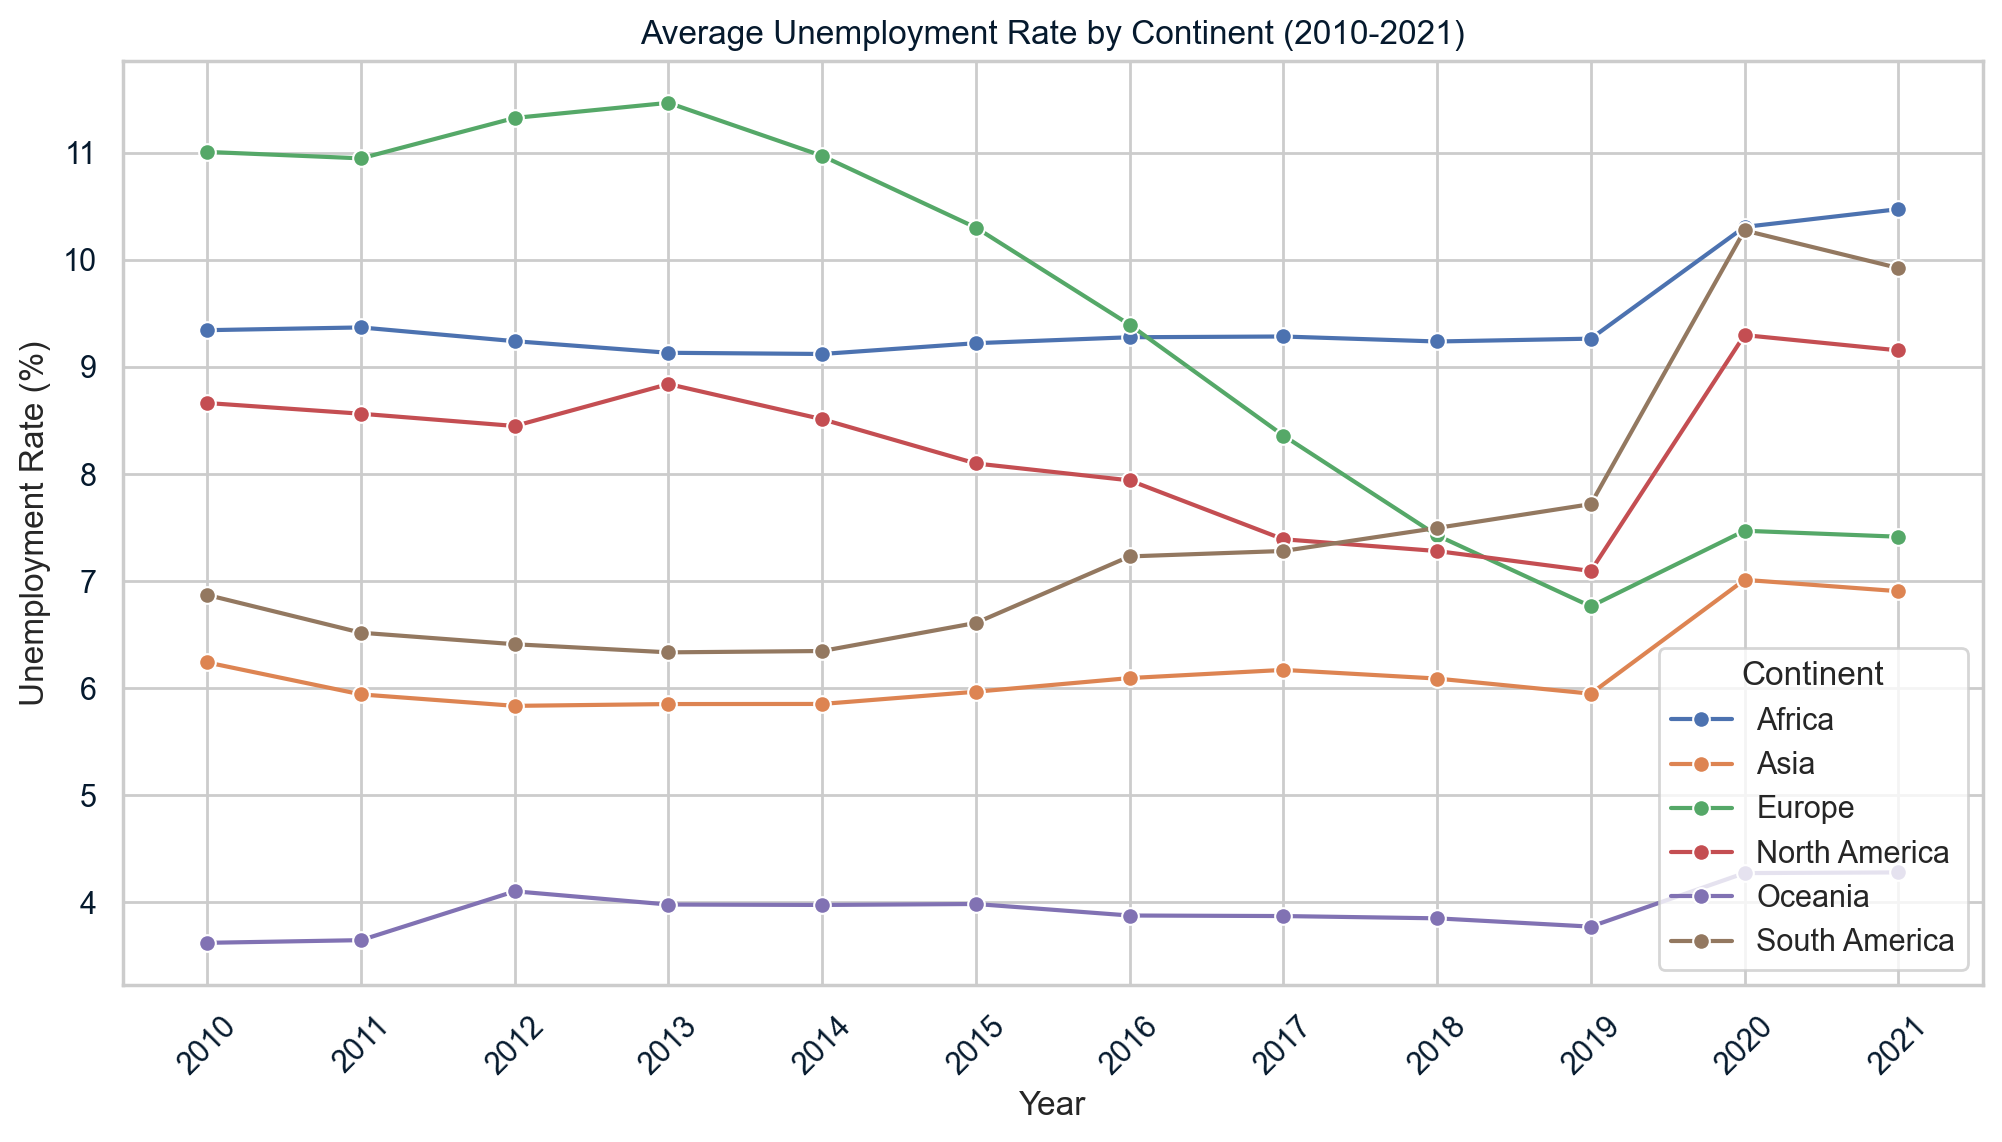

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the global unemployment rate trend from 2010 to 2021
years = [str(year) for year in range(2010, 2022)]
global_unemployment_rate = df[years].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=years, y=global_unemployment_rate, marker='o')
plt.title('Global Unemployment Rate Trend (2010-2021)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of unemployment rates in 2021 by continent
plt.figure(figsize=(12, 6))
sns.boxplot(x='continent', y='2021', data=df)
plt.title('Distribution of Unemployment Rates in 2021 by Continent')
plt.xlabel('Continent')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Plot the average unemployment rate by continent over the years
continent_avg_unemployment = df.groupby('continent')[years].mean().T

plt.figure(figsize=(12, 6))
for continent in continent_avg_unemployment.columns:
    sns.lineplot(x=years, y=continent_avg_unemployment[continent], label=continent, marker='o')

plt.title('Average Unemployment Rate by Continent (2010-2021)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Continent')
plt.xticks(rotation=45)
plt.show()

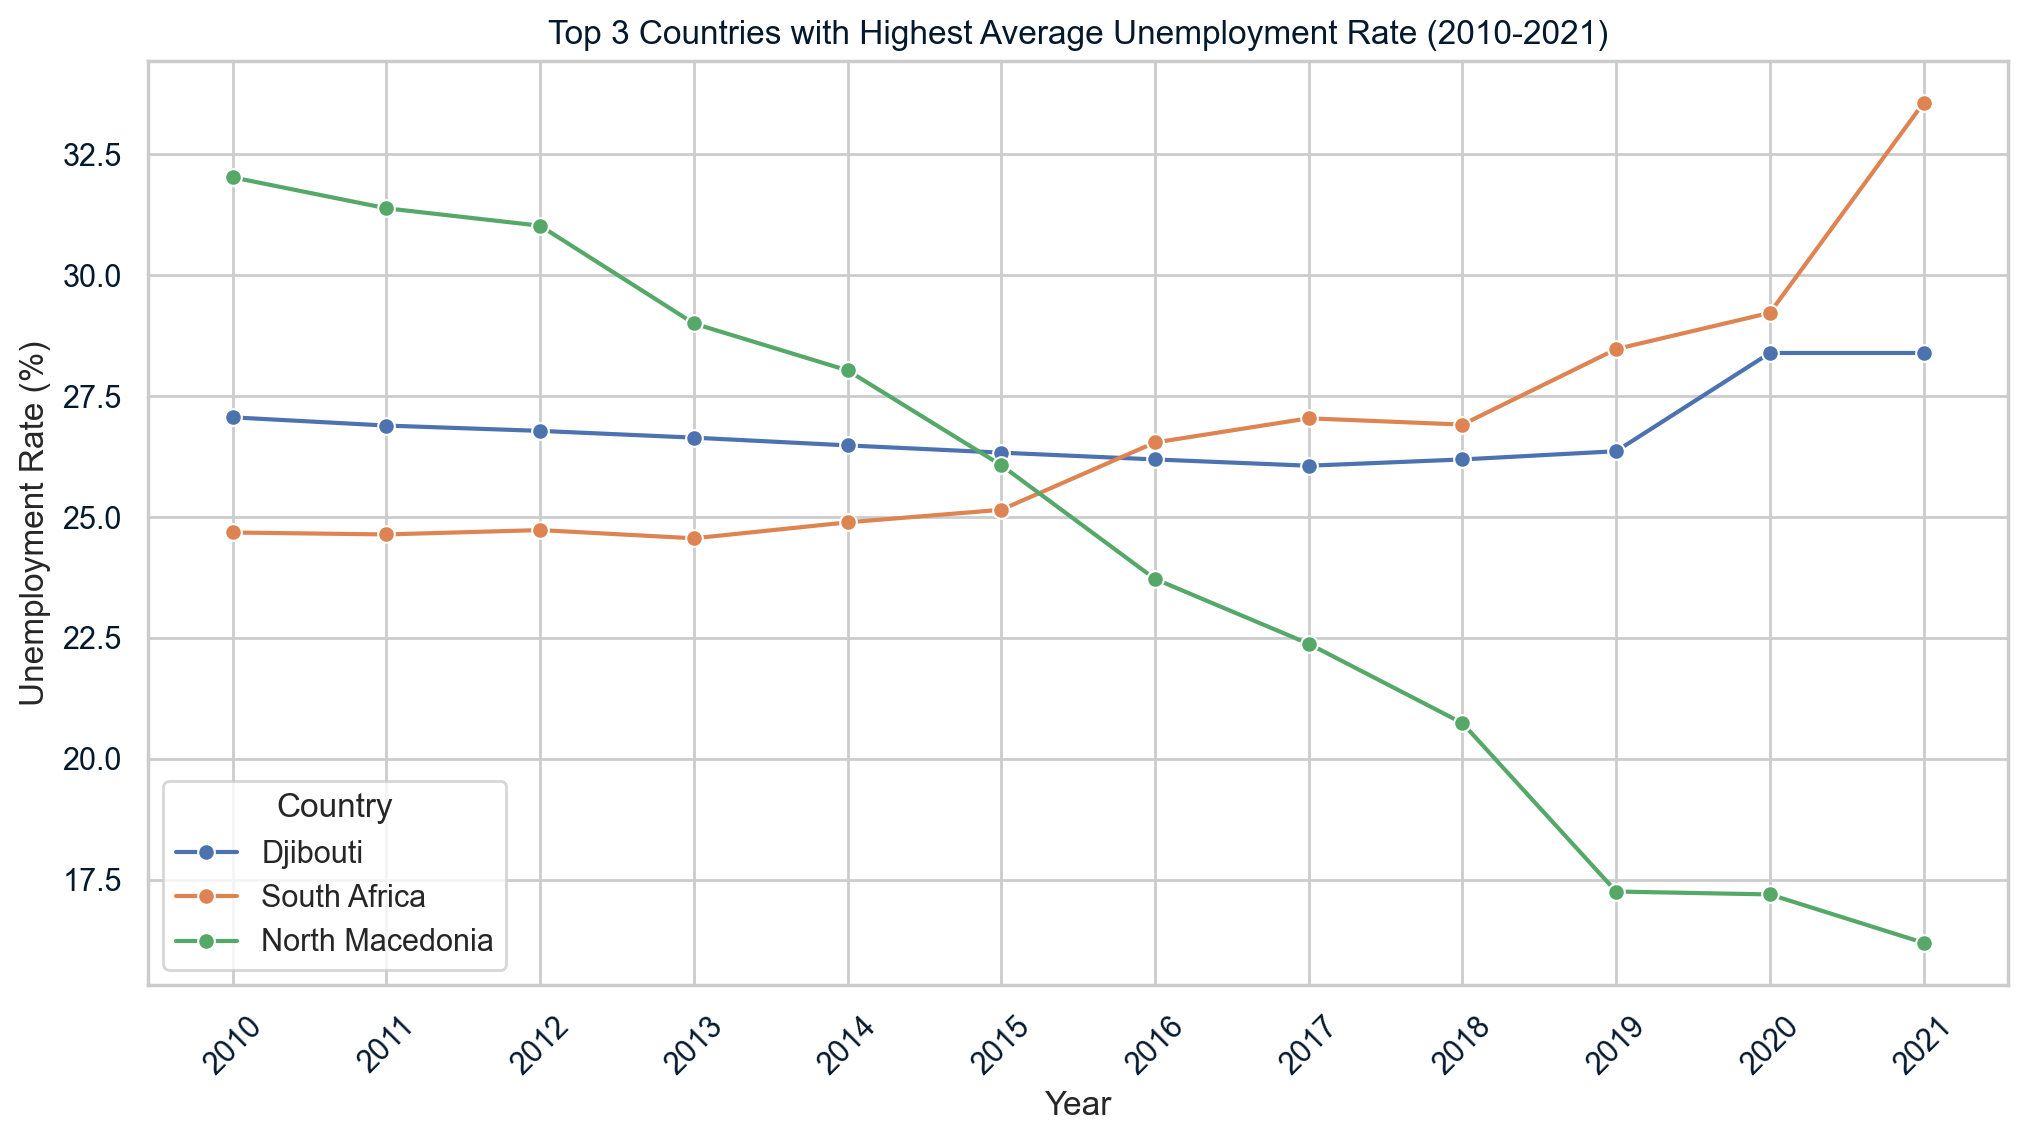

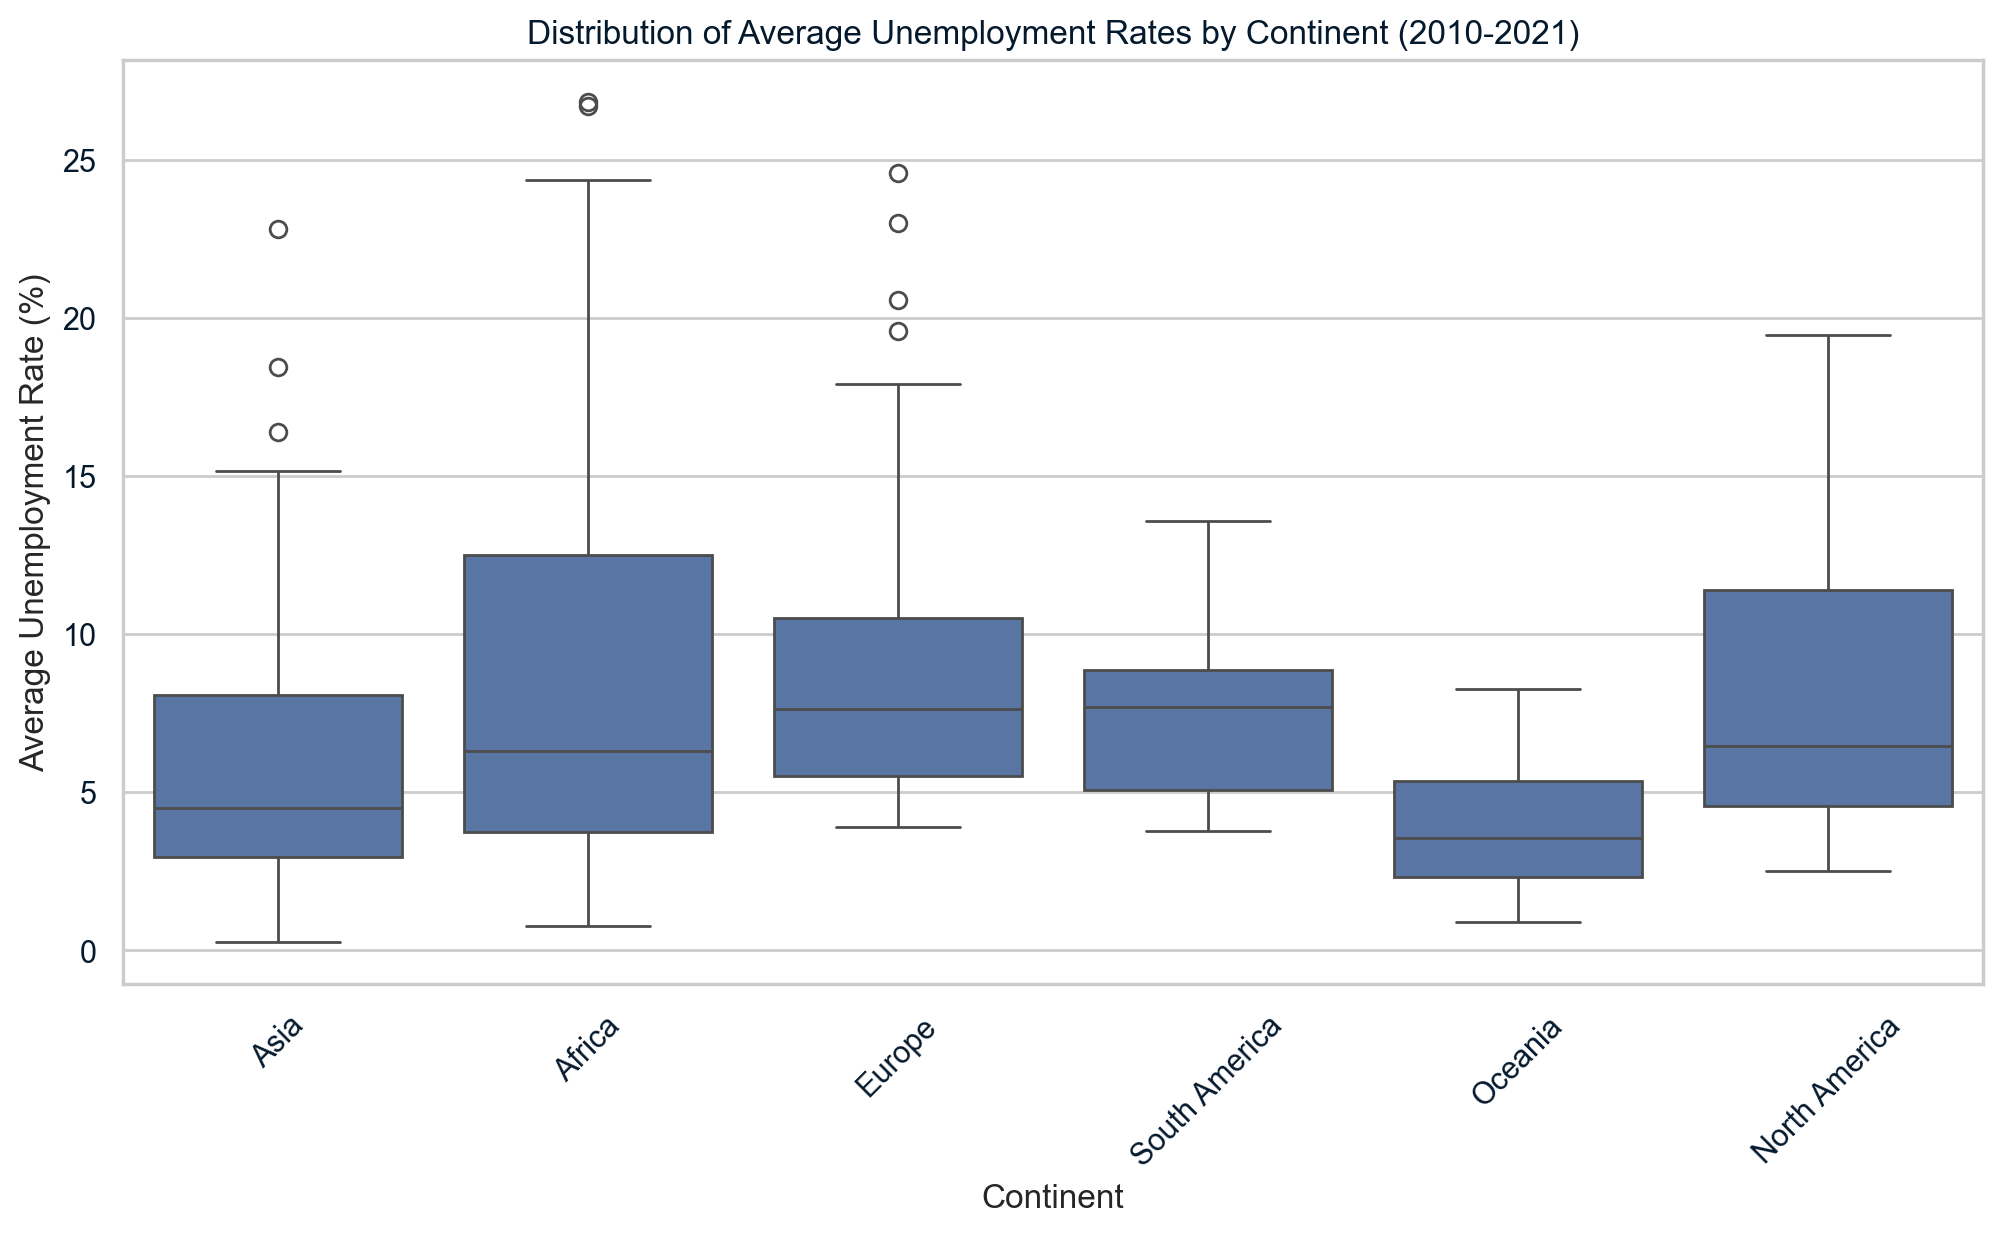

In [47]:
# Plot the top 3 countries with the highest average unemployment rate from 2010 to 2021
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average unemployment rate for each country
years = [str(year) for year in range(2010, 2022)]
df['average_unemployment_rate'] = df[years].mean(axis=1)

# Get the top 3 countries with the highest average unemployment rate
top_3_countries = df.nlargest(3, 'average_unemployment_rate')

plt.figure(figsize=(12, 6))
for country in top_3_countries['country_name']:
    sns.lineplot(x=years, y=top_3_countries[top_3_countries['country_name'] == country][years].values.flatten(), label=country, marker='o')

plt.title('Top 3 Countries with Highest Average Unemployment Rate (2010-2021)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of average unemployment rates by continent
plt.figure(figsize=(12, 6))
sns.boxplot(x='continent', y='average_unemployment_rate', data=df)
plt.title('Distribution of Average Unemployment Rates by Continent (2010-2021)')
plt.xlabel('Continent')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()